In [2]:
import pandas as pd

In [4]:

df = pd.read_csv('static_seriea_26.csv')


In [8]:
print(df.columns)
# print(df.head())  # Visualize as primeiras linhas do DataFrame
# print(df.describe())  # Resumo estatístico dos dados

Index(['Team', 'Goals', 'Shots pg', 'Discipline', 'Possession%', 'Pass%',
       'AerialsWon', 'Rating'],
      dtype='object')


0              1. Botafogo RJ
1                2. Palmeiras
2      3. Red Bull Bragantino
3              4. Atletico MG
4                 5. Flamengo
5     6. Athletico Paranaense
6               7. Fluminense
7                8. Fortaleza
8                 9. Cruzeiro
9                  10. Gremio
10                  11. Bahia
11              12. Sao Paulo
12            13. Corinthians
13                 14. Cuiaba
14          15. Internacional
15                  16. Goias
16          17. Vasco da Gama
17              18. Santos FC
18               19. Coritiba
19             20. America MG
Name: Team, dtype: object

In [9]:
# for team in df:

#     time = team['Team']

df  

,Team,Goals,Shots pg,Discipline,Possession%,Pass%,AerialsWon,Rating
0,1. Botafogo RJ,45,12.9,663,46.4,81.3,14.2,6.81
1,2. Palmeiras,47,15.7,722,53.4,83.1,13.5,6.74
2,3. Red Bull Bragantino,41,16.4,852,56.4,79.5,15.0,6.73
3,4. Atletico MG,34,13.0,914,53.4,82.7,13.9,6.72
4,5. Flamengo,43,12.9,632,58.7,86.1,12.4,6.71
5,6. Athletico Paranaense,44,14.7,814,47.2,80.1,15.5,6.69
6,7. Fluminense,42,14.4,887,61.9,87.5,11.9,6.68
7,8. Fortaleza,33,14.9,741,47.1,81.4,15.6,6.67
8,9. Cruzeiro,28,13.7,763,51.4,81.3,14.9,6.66
9,10. Gremio,46,12.6,764,45.5,78.5,13.5,6.65


# MACHINE LEARNING

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separando os recursos (X) e a variável de destino (y)
X = df[['Goals', 'Shots pg', 'Discipline', 'Possession%', 'Pass%', 'AerialsWon']]
y = df['Rating']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados (opcional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LinearRegression

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
from sklearn.metrics import r2_score

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²): {r2}")


Coeficiente de Determinação (R²): 0.5331646776468161


In [16]:
# Exemplo de previsão
new_data = [[35, 14.0, 750, 50.0, 82.0, 14.5]]
predicted_rating = model.predict(new_data)
print(f"Previsão da Pontuação (Rating): {predicted_rating[0]}")


Previsão da Pontuação (Rating): 14.19763901043612


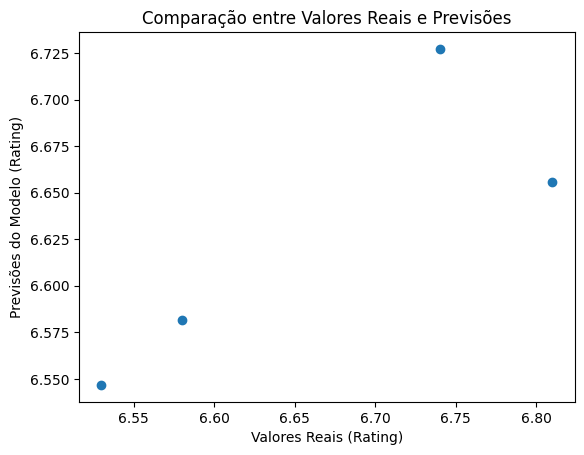

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais (Rating)')
plt.ylabel('Previsões do Modelo (Rating)')
plt.title('Comparação entre Valores Reais e Previsões')
plt.show()


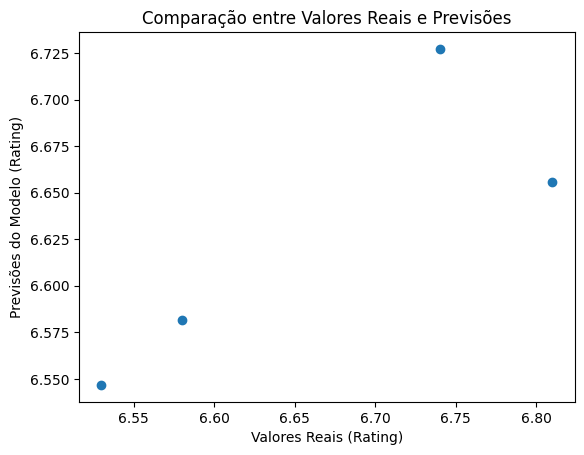

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais (Rating)')
plt.ylabel('Previsões do Modelo (Rating)')
plt.title('Comparação entre Valores Reais e Previsões')
plt.show()


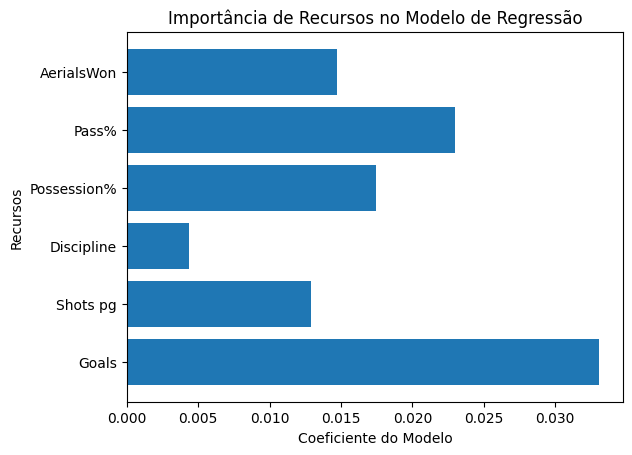

In [19]:
import numpy as np

feature_names = ['Goals', 'Shots pg', 'Discipline', 'Possession%', 'Pass%', 'AerialsWon']
coef = model.coef_

plt.barh(feature_names, coef)
plt.xlabel('Coeficiente do Modelo')
plt.ylabel('Recursos')
plt.title('Importância de Recursos no Modelo de Regressão')
plt.show()


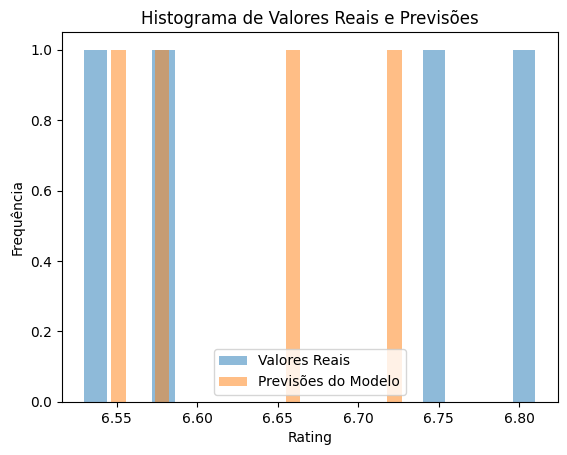

In [20]:
plt.hist(y_test, bins=20, alpha=0.5, label='Valores Reais')
plt.hist(y_pred, bins=20, alpha=0.5, label='Previsões do Modelo')
plt.xlabel('Rating')
plt.ylabel('Frequência')
plt.legend()
plt.title('Histograma de Valores Reais e Previsões')
plt.show()


/home/pmaubouro/Área de Trabalho/SOCCER_SCRAPPING/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/pmaubouro/Área de Trabalho/SOCCER_SCRAPPING/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/pmaubouro/Área de Trabalho/SOCCER_SCRAPPING/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/pmaubouro/Área de Trabalho/SOCCER_SCRAPPING/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/pmaubo

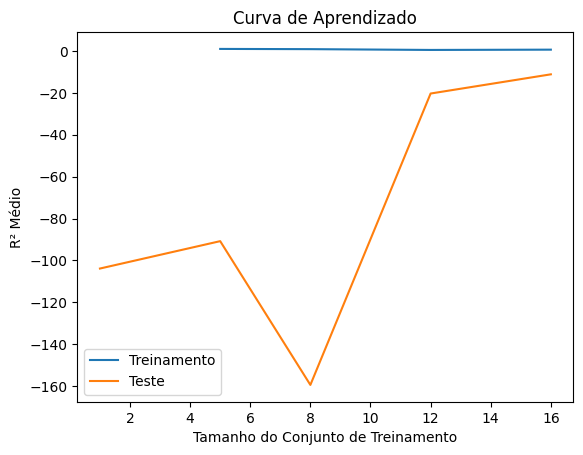

In [21]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Treinamento')
plt.plot(train_sizes, test_scores_mean, label='Teste')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('R² Médio')
plt.title('Curva de Aprendizado')
plt.legend()
plt.show()


In [22]:
import statsmodels.api as sm

residuals = y_test - y_pred
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sm.qqplot(residuals, line='s', ax=ax[0])
ax[0].set_title('Gráfico QQ dos Resíduos')
sm.ProbPlot(residuals).qqplot(line='s', ax=ax[1])
ax[1].set_title('Gráfico P-P dos Resíduos')
plt.show()


ModuleNotFoundError: No module named 'statsmodels'